In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

In [2]:
def removeLines(img):
    image= cv2.imread(img,0) # reads image as grayscale

    # use gaussian filter to smooth the image
    binary= cv2.GaussianBlur(image,(3,3),10)
    # use otsu thresholding for accurate conversion to binary image
    thresh = threshold_otsu(image)
    binary = image > thresh
    # convert binary image to uint8 with 255 as white and 0 as black
    binary = binary.astype(np.uint8)*255
    binary_inv = cv2.bitwise_not(binary)
    # Identifying the horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    detected_lines = cv2.morphologyEx(binary_inv, cv2.MORPH_OPEN,
    horizontal_kernel, iterations=1)

    # dialate the detected lines
    detected_lines = cv2.dilate(detected_lines, np.ones((3,2)), iterations=1)

    # GaussianBlur the detected lines
    detected_lines= cv2.GaussianBlur(detected_lines,(3,3),10)
    detected_lines_inv = cv2.bitwise_not(detected_lines)

    plt.imshow(detected_lines, cmap='gray')
    plt.title('Detected Lines')
    plt.axis('off')
    plt.show()

    newimg= cv2.inpaint(image,detected_lines,2,cv2.INPAINT_TELEA)
    plt.imshow(newimg, cmap='gray',)
    plt.title('Inpainted Image')
    plt.axis('off')
    plt.show()
    
    # Save the inpainted image
    output1_path = 'output1.jpg'
    cv2.imwrite(output1_path, newimg)
    print("Inpainted image saved as:", output1_path)
    
    return newimg

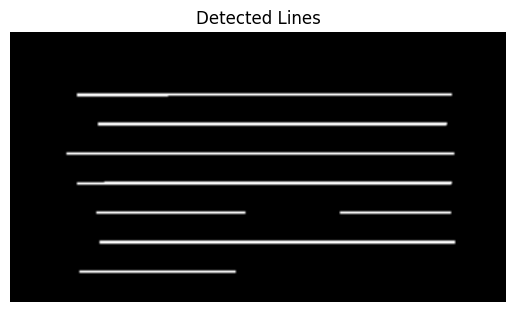

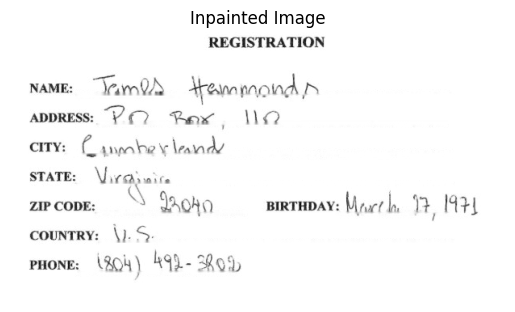

Inpainted image saved as: output1.jpg


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [3]:
removeLines('document.jpg')


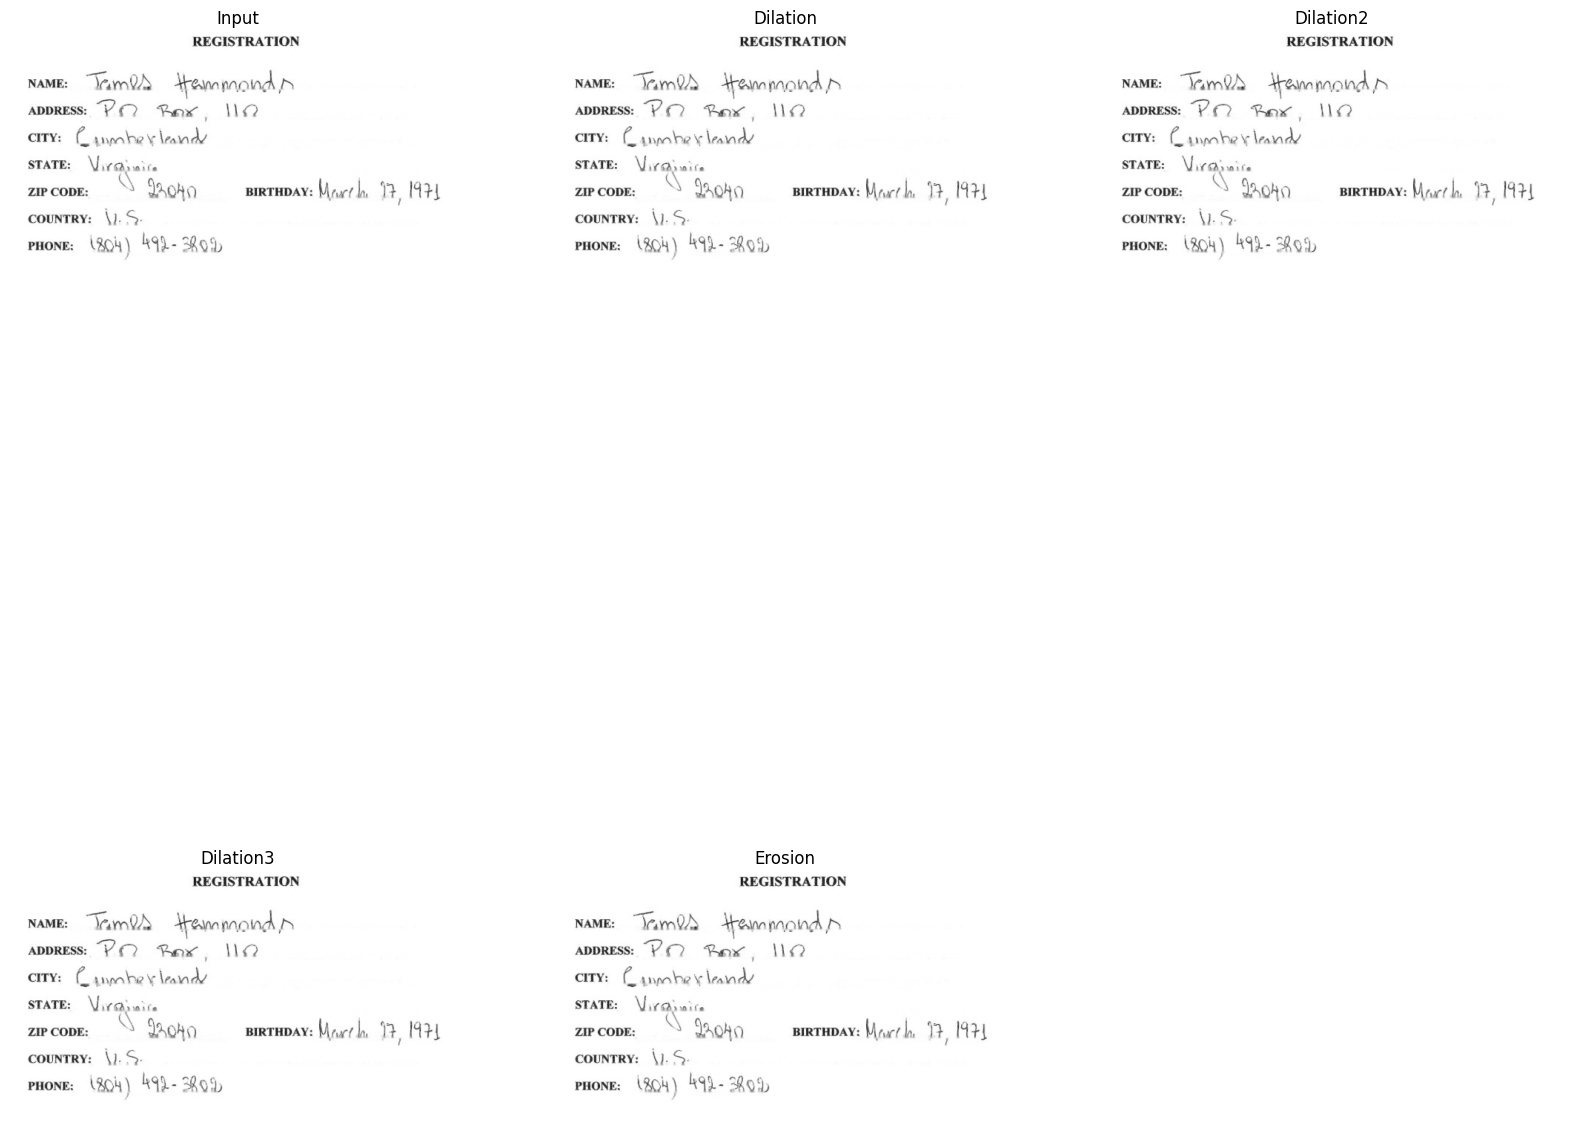

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the input image
img = cv2.imread('output1.jpg', 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((1, 1), np.uint8)

# Perform erosion and dilation
img_dilation = cv2.dilate(img, kernel, iterations=3)
img_dilation1 = cv2.dilate(img_dilation, kernel, iterations=1)
img_dilation2 = cv2.dilate(img_dilation1, kernel, iterations=1)
img_erosion = cv2.erode(img_dilation2, kernel, iterations=5)

# Adjust figure size for high definition
plt.figure(figsize=(20, 20))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Input')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_dilation1, cmap='gray')
plt.title('Dilation2')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_dilation2, cmap='gray')
plt.title('Dilation3')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

# Save the figure with high DPI
plt.savefig('output_images2.png', dpi=300)

plt.show()


Segmented image with bounding boxes saved as: output2.jpg


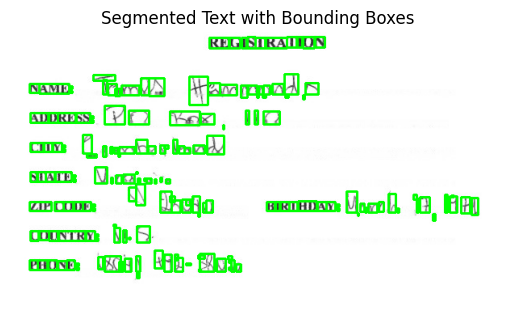

Segmented image with bounding boxes saved as: output2_opencv.jpg


[(294, 7, 10, 14),
 (343, 7, 12, 13),
 (356, 7, 6, 13),
 (363, 7, 14, 14),
 (378, 7, 12, 13),
 (247, 8, 24, 13),
 (272, 8, 13, 13),
 (287, 8, 6, 13),
 (304, 8, 12, 13),
 (317, 8, 26, 13),
 (340, 53, 17, 25),
 (103, 54, 27, 7),
 (222, 56, 23, 35),
 (162, 58, 10, 21),
 (172, 58, 19, 22),
 (115, 60, 5, 18),
 (24, 65, 12, 11),
 (36, 65, 37, 12),
 (121, 65, 11, 14),
 (245, 64, 15, 15),
 (325, 65, 14, 13),
 (366, 64, 16, 14),
 (138, 67, 22, 12),
 (260, 66, 21, 13),
 (286, 67, 8, 15),
 (295, 67, 11, 11),
 (314, 67, 8, 11),
 (74, 68, 3, 3),
 (308, 68, 5, 10),
 (130, 71, 6, 9),
 (74, 74, 3, 2),
 (306, 79, 2, 3),
 (313, 79, 4, 3),
 (341, 79, 4, 3),
 (363, 79, 2, 5),
 (117, 92, 25, 23),
 (147, 98, 25, 17),
 (198, 99, 37, 17),
 (292, 98, 4, 17),
 (303, 98, 4, 17),
 (314, 99, 20, 16),
 (25, 101, 22, 12),
 (48, 101, 11, 12),
 (59, 101, 22, 12),
 (82, 101, 17, 12),
 (236, 102, 17, 13),
 (100, 105, 3, 3),
 (100, 110, 3, 3),
 (264, 116, 1, 5),
 (90, 128, 11, 23),
 (244, 129, 21, 23),
 (156, 134, 14, 17

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def text_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to obtain a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Initialize list to store word bounding boxes
    word_boxes = []
    for label in range(1, num_labels):
        x, y, w, h, area = stats[label] 
        if area < 3: 
            continue
        word_boxes.append((x, y, w, h))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Text with Bounding Boxes')
    plt.axis('off')
    
    # Save the displayed image
    output2_path = 'output2.jpg'
    plt.savefig(output2_path)
    print("Segmented image with bounding boxes saved as:", output2_path)
    
    # Show the displayed image
    plt.show()
    
    # Save the segmented image with bounding boxes
    cv2.imwrite('output2_opencv.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    print("Segmented image with bounding boxes saved as: output2_opencv.jpg")
    
    return word_boxes

text_segmentation("output1.jpg")


In [10]:
def segment_words(binary_img):
    # Find connected components (words) in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=8)
    bounding_boxes = []
    average_width = np.mean(stats[1:, cv2.CC_STAT_WIDTH])
    
    for i in range(1, num_labels - 1):  # Change the range to avoid going out of bounds
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        
        # Check if the box width is less than half the average width
        # or if there are overlapping pixels with the next box
        if w < average_width / 2 or (x + w > stats[i + 1, cv2.CC_STAT_LEFT]):
            # Merge the current box with the next one
            next_x = stats[i + 1, cv2.CC_STAT_LEFT]
            next_y = stats[i + 1, cv2.CC_STAT_TOP]
            next_w = stats[i + 1, cv2.CC_STAT_WIDTH]
            next_h = stats[i + 1, cv2.CC_STAT_HEIGHT]
            
            # Create a new bounding box that encompasses both
            merged_x = min(x, next_x)
            merged_y = min(y, next_y)
            merged_w = max(x + w, next_x + next_w) - merged_x
            merged_h = max(y + h, next_y + next_h) - merged_y
            
            bounding_boxes.append((merged_x, merged_y, merged_w, merged_h))
            # Skip the next box since it has been merged
            i += 1
        else:
            bounding_boxes.append((x, y, w, h))
    
    return bounding_boxes

# Load the original image in color
original_image_path = 'output2_opencv.jpg'
color_image = cv2.imread(original_image_path)

# Convert the color image to grayscale and then to binary
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Call the function to segment words
word_bounding_boxes = segment_words(binary_image)

# Display the bounding boxes on the original color image
for bbox in word_bounding_boxes:
    x, y, w, h = bbox
    cv2.rectangle(color_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

# Show the image with colored bounding boxes
cv2.imshow('Word Segmentation', color_image)

# Wait for the ESC key to be pressed to close the window
while True:
    k = cv2.waitKey(1)
    if k == 26:  # ESC key
        break

cv2.destroyAllWindows()

2024-04-26 13:31:37.990 Python[43490:1327023] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def text_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to obtain a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    
    # Initialize list to store word bounding boxes
    word_boxes = []
    for label in range(1, num_labels):
        x, y, w, h, area = stats[label]
        
        # Filter out small components (noise)
        if area < 4: 
            continue
        word_boxes.append((x, y, w, h))
        
        # Draw bounding box on the original image (for visualization)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0,255), 2)
    
    # Display the segmented words with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Text with Bounding Boxes')
    plt.axis('off')
    
    # Save the displayed image
    output2_path = 'output2.jpg'
    plt.savefig(output2_path)
    print("Segmented image with bounding boxes saved as:", output2_path)
    
    # Show the displayed image
    plt.show()
    
    # Save the segmented image with bounding boxes
    cv2.imwrite('output2_opencv.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    print("Segmented image with bounding boxes saved as: output2_opencv.jpg")
    
    return word_boxes

def merge_boxes(word_boxes):
    # Sort the word boxes by their y-coordinate (top-left corner)
    sorted_boxes = sorted(word_boxes, key=lambda box: box[1])
    
    # Initialize a list to store the merged word bounding boxes
    merged_boxes = []
    
    # Iterate through the sorted word boxes
    i = 0
    while i < len(sorted_boxes):
        x1, y1, w1, h1 = sorted_boxes[i]
        x_end1 = x1 + w1
        
        # Initialize the merged box with the current box
        merged_box = [x1, y1, w1, h1]
        
        # Look for adjacent boxes to merge
        j = i + 1
        while j < len(sorted_boxes):
            x2, y2, w2, h2 = sorted_boxes[j]
            
            # Check if the boxes are in the same line and close enough
            if y2 >= y1 and x2 - x_end1 <= 2 * w1:
                # Merge the boxes
                merged_box[2] = w2 + w1  # Update the width
                merged_box[3] = max(merged_box[3], h2)   # Update the height
                x_end1 = x2 + w2  # Update the end of the first box
                j += 1  # Move to the next box
            else:
                break
        
        # Add the merged box to the list of merged boxes
        merged_boxes.append(tuple(merged_box))
        
        # Move to the next box
        i = j
        
    # Save the displayed image
    output3_path = 'output3.jpg'
    plt.savefig(output3_path)
    print("Segmented image with bounding boxes saved as:", output3_path)
    
    # Show the displayed image
    plt.show()
    
    # Save the segmented image with bounding boxes
    cv2.imwrite('output3_opencv.jpg', cv2.cvtColor(merge_boxes, cv2.COLOR_BGR2RGB))
    print("Segmented image with bounding boxes saved as: output3_opencv.jpg")
    
    return merged_boxes


Segmented image with bounding boxes saved as: output2.jpg


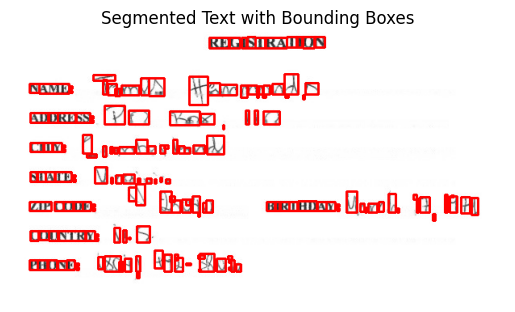

Segmented image with bounding boxes saved as: output2_opencv.jpg
Segmented image with bounding boxes saved as: output3.jpg


<Figure size 640x480 with 0 Axes>

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [90]:
# Example usage:
image_path = "output1.jpg"
segmented_boxes = text_segmentation(image_path)
merged_boxes = merge_boxes(segmented_boxes)
print("Segmented Boxes:", segmented_boxes)
print("Merged Boxes:", merged_boxes)

image = cv2.imread(image_path)
for box in merged_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x+w, y + h), (0, 255, 0), 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Merged Text with Bounding Boxes')
plt.axis('off')
plt.show()